In [1]:
import pandas as pd
import numpy as npc
%matplotlib inline
import re

In [2]:
%ls

 驱动器 F 中的卷是 Reference
 卷的序列号是 D816-40EC

 F:\workspace 的目录

2017-06-01  16:11    <DIR>          .
2017-06-01  16:11    <DIR>          ..
2017-06-01  16:11    <DIR>          .ipynb_checkpoints
2017-05-13  16:38            17,555 12月产品利润表.xlsx
2017-04-05  09:39           267,951 Amazon AliExpress Ebay Wish.txt
2017-03-29  17:10             5,558 cat.csv
2017-05-12  15:18            19,456 Epacket.xls
2017-03-29  14:57             6,064 hanseless.csv
2017-05-04  15:13             6,575 iris_corr.png
2017-01-16  09:26             5,936 MSJN060.xlsx
2017-01-16  13:06             9,784 MSJN060_stock.xlsx
2017-01-16  16:09           807,236 profit_source.xls
2017-03-29  15:07            38,012 simple_sum.csv
2017-05-23  14:28           252,760 test.csv
2017-05-23  09:31           196,996 test1.csv
2017-05-23  17:03            53,807 total.csv
2017-05-24  16:43         2,436,003 采购链接.csv
2017-03-27  10:24            31,744 成交核心指标分析201601.xls
2017-03-27  10:25            31,232 成交核心指标分析201602.x

In [3]:
path = r"F:\workspace\Amazon AliExpress Ebay Wish.txt"

In [4]:
with open(path, encoding="utf-8") as f:
    file = f.read()
    pa = re.compile(r'^(\d{4}-\d{2}-\d{2}) (\d{2}:\d{2}:\d{2}) (\w+)\((\d+)\)\n(.*?)\n$',re.DOTALL+re.MULTILINE)
    ma = re.findall(pa,file)
    # print(len(ma))
    data = []
    for i in range(len(ma)):
        # print(ma[i][0])
        info = {
            'date': ma[i][0],
            'time': ma[i][1],
            'name': ma[i][2],
            'qq_number': ma[i][3],
            'word':ma[i][4]
               }
        data.append(info)

In [5]:
data

[{'date': '2017-01-04',
  'name': '系统消息',
  'qq_number': '10000',
  'time': '13:08:01',
  'word': '你已经是群成员了，和大家打个招呼吧！'},
 {'date': '2017-01-04',
  'name': '系统消息',
  'qq_number': '10000',
  'time': '13:08:16',
  'word': 'DHL邀请Kelly加入了本群'},
 {'date': '2017-01-04',
  'name': '系统消息',
  'qq_number': '10000',
  'time': '13:08:20',
  'word': 'DHL邀请Molly加入了本群'},
 {'date': '2017-01-04',
  'name': '系统消息',
  'qq_number': '10000',
  'time': '13:08:39',
  'word': 'DHL邀请Tony加入了本群'},
 {'date': '2017-01-04',
  'name': '系统消息',
  'qq_number': '10000',
  'time': '13:09:49',
  'word': 'DHL邀请johnnie加入了本群'},
 {'date': '2017-01-04',
  'name': '系统消息',
  'qq_number': '10000',
  'time': '13:09:50',
  'word': 'DHL邀请大许加入了本群'},
 {'date': '2017-01-04',
  'name': '系统消息',
  'qq_number': '10000',
  'time': '13:09:51',
  'word': 'DHL邀请啊敏加入了本群'},
 {'date': '2017-01-04',
  'name': '系统消息',
  'qq_number': '10000',
  'time': '13:09:56',
  'word': 'DHL邀请Eric加入了本群'},
 {'date': '2017-01-04',
  'name': '系统消息',
  'qq_number': '1

In [6]:
len(data)

1766

In [7]:
df = pd.DataFrame(data)

In [8]:
df.head()

,date,name,qq_number,time,word
0,2017-01-04,系统消息,10000,13:08:01,你已经是群成员了，和大家打个招呼吧！
1,2017-01-04,系统消息,10000,13:08:16,DHL邀请Kelly加入了本群
2,2017-01-04,系统消息,10000,13:08:20,DHL邀请Molly加入了本群
3,2017-01-04,系统消息,10000,13:08:39,DHL邀请Tony加入了本群
4,2017-01-04,系统消息,10000,13:09:49,DHL邀请johnnie加入了本群


In [9]:
new_df = df[df.qq_number != '10000']

In [10]:
new_df.head()

,date,name,qq_number,time,word
73,2017-01-04,海阔天空,273789428,13:35:50,这是个啥群
80,2017-01-04,大许,348657982,13:36:27,这是刷单群
84,2017-01-04,商学伟博士,285991925,13:38:36,我进来做什么呢
86,2017-01-04,Smile,1442679928,13:40:05,有海外仓吗
87,2017-01-04,商学伟博士,285991925,13:40:07,货代


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 5 columns):
date         1766 non-null object
name         1766 non-null object
qq_number    1766 non-null object
time         1766 non-null object
word         1766 non-null object
dtypes: object(5)
memory usage: 34.5+ KB


In [12]:
df.dtypes

date         object
name         object
qq_number    object
time         object
word         object
dtype: object

In [13]:
df.describe()

,date,name,qq_number,time,word
count,1766,1766,1766,1766,1766
unique,50,137,129,1677,1595
top,2017-01-06,系统消息,10000,14:56:32,[表情]
freq,284,398,393,3,47


In [14]:
df.name.unique()

array(['系统消息', '海阔天空', '大许', '商学伟博士', 'Smile', '钨国界503', '鸿基黎小姐', '遇见',
       '汇壕科技', '心品', '在路上', '鲁夫', '窄巷', '初吻', '蓝', '邱忙琴', '等待',
       '2629670712', '1253756001', '玖零大叔', 'sachi', 'MIKE', '春之草', '明影',
       'sherry', '张义圣', 'Kumari', 'Sam', 'JACK', '卢俊豪', '放牛娃的春天', 'sam',
       '速卖通陈胖子', '412022082', 'Dylan', '肖珍', '狗耳朵', '芳芳', '小海鸥', '水泪哲vs蝈蝈',
       '郭大侠', '追梦人', '辛巴达amy', 'LZ', 'Leo', '疯狂的QQ', 'June', '雾霾精灵',
       'A百力英伦电动牙刷', 'Lone', '蓝筝', 'Amo', '肉肉', '海螺', '宠物用品专卖', '584063361',
       'ぐLavidぐ', 'LX', '小小', '花馨逸薇岸', '开欣典', '亚马逊', '八戒也很帅', '挣钱打麻将',
       'Summer', 'shashasha', '小凤', '西去的骑士', '淡', '维尔斯光电', 'Joyce', 'Nan',
       '小', '远逝的梦', 'Allen', '均辉物流集团', '梅子', 'martin', '三问书生', '瑕疵', '叮当',
       '飞机', '亢龙有悔', '3331795352', '1179857789', '870454886', '408615618',
       '反差萌胖喵', '542906089', '737481191', '282776284', '2606931334', '未挽',
       'tiffani', '纯粹扯蛋', '瀚翼科技', '冰枫うＳｋｙ', 'Angela起舞', 'Night', '闲庭冷月',
       '烤鸭', '魔界鬼帝', 'Jacky', '小小七的老公', 'Amazon', 'Je

In [15]:
new_df = df.groupby('name').count()

In [16]:
new_df

,date,qq_number,time,word
name,,,,
1179857789,3,3,3,3
1253756001,1,1,1,1
2606931334,1,1,1,1
2629670712,1,1,1,1
282776284,1,1,1,1
3331795352,3,3,3,3
408615618,1,1,1,1
412022082,4,4,4,4
542906089,1,1,1,1


In [17]:
Sorted = new_df.sort_values(['word'], ascending=False)

In [18]:
Sorted

,date,qq_number,time,word
name,,,,
系统消息,398,398,398,398
shashasha,125,125,125,125
烦恼的狐狸,116,116,116,116
Dylan,106,106,106,106
八戒也很帅,89,89,89,89
等待,71,71,71,71
Amo,50,50,50,50
飞机,47,47,47,47
Lone,40,40,40,40


In [19]:
df[df['word'].str.contains('表情')].groupby('name').count().sort_values(['word'], ascending=False).head()

,date,qq_number,time,word
name,,,,
shashasha,21,21,21,21
Dylan,10,10,10,10
鸿基黎小姐,6,6,6,6
追梦人,3,3,3,3
维尔斯光电,3,3,3,3


In [20]:
df[df['word'].str.contains('图片')].groupby('name').count().sort_values(['word'], ascending=False).head()

,date,qq_number,time,word
name,,,,
天涯,13,13,13,13
shashasha,8,8,8,8
速卖通陈胖子,4,4,4,4
Dylan,3,3,3,3
martin,2,2,2,2


In [21]:
df = df.set_index(df.date)
df

,date,name,qq_number,time,word
date,,,,,
2017-01-04,2017-01-04,系统消息,10000,13:08:01,你已经是群成员了，和大家打个招呼吧！
2017-01-04,2017-01-04,系统消息,10000,13:08:16,DHL邀请Kelly加入了本群
2017-01-04,2017-01-04,系统消息,10000,13:08:20,DHL邀请Molly加入了本群
2017-01-04,2017-01-04,系统消息,10000,13:08:39,DHL邀请Tony加入了本群
2017-01-04,2017-01-04,系统消息,10000,13:09:49,DHL邀请johnnie加入了本群
2017-01-04,2017-01-04,系统消息,10000,13:09:50,DHL邀请大许加入了本群
2017-01-04,2017-01-04,系统消息,10000,13:09:51,DHL邀请啊敏加入了本群
2017-01-04,2017-01-04,系统消息,10000,13:09:56,DHL邀请Eric加入了本群
2017-01-04,2017-01-04,系统消息,10000,13:10:01,DHL邀请kenny加入了本群


In [22]:
date_df = df.groupby('date').count()

In [23]:
date_df

,name,qq_number,time,word
date,,,,
2017-01-04,240,240,240,240
2017-01-05,16,16,16,16
2017-01-06,284,284,284,284
2017-01-07,71,71,71,71
2017-01-08,11,11,11,11
2017-01-09,43,43,43,43
2017-01-10,12,12,12,12
2017-01-11,275,275,275,275
2017-01-12,21,21,21,21


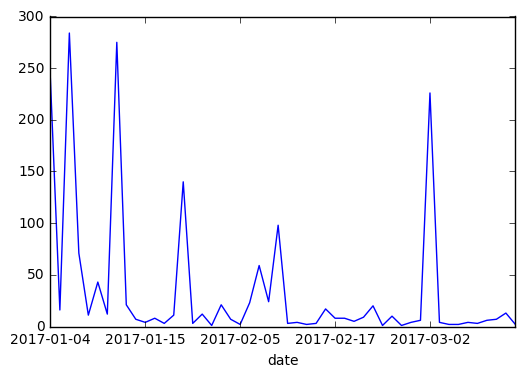

In [24]:
date_df['name'].plot()

In [25]:
date_std = date_df['name']/date_df['name'].max()

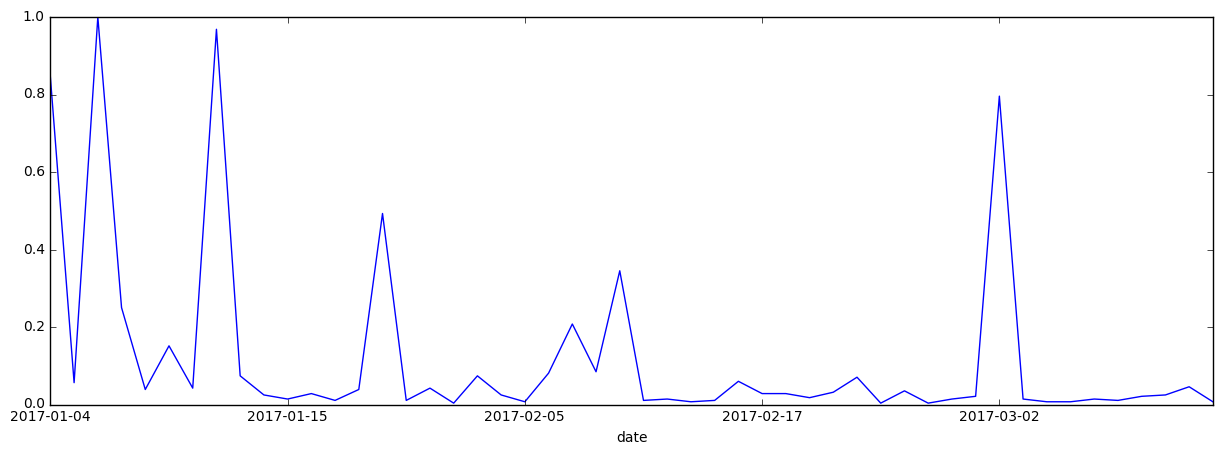

In [26]:
date_std.plot(figsize=(15,5))

In [28]:
df['real_time'] = df['date'] +' '+ df['time']
df['real_time'].head()

date
2017-01-04    2017-01-04 13:08:01
2017-01-04    2017-01-04 13:08:16
2017-01-04    2017-01-04 13:08:20
2017-01-04    2017-01-04 13:08:39
2017-01-04    2017-01-04 13:09:49
Name: real_time, dtype: object

In [39]:
times = pd.DatetimeIndex(df.real_time)
grouped = df.groupby([times.hour])

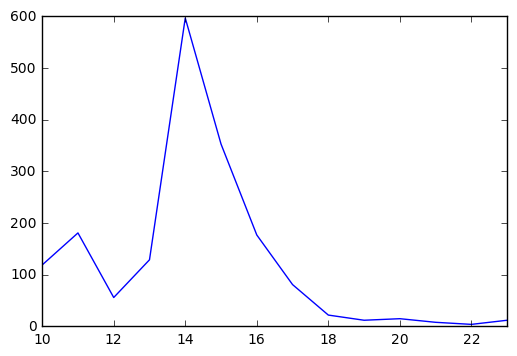

In [41]:
grouped.count()['date'].plot()